# Exercises for Time Series Date-Time Formats

In [5]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
from vega_datasets import data

In [4]:
#Load in the Sf temps data
df = data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [6]:
#Check the dtypes of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [9]:
#set date to index
df = df.set_index('date').sort_index()
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


## 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

<AxesSubplot:xlabel='date'>

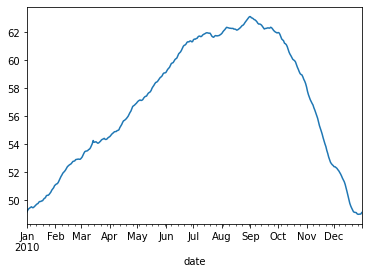

In [10]:
df.resample('D').mean().temp.plot(label = 'Daily resample')

## 2. Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

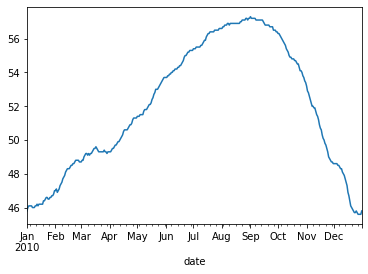

In [11]:
df.resample('D').min().temp.plot(label = 'Daily Min Temp Over Time')

## 3. Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

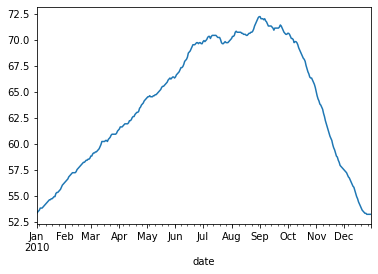

In [17]:
df.resample('D').temp.max().plot(label = 'Daily Max Temp Over Time')

# 4. Which month is the coldest, on average?

<AxesSubplot:xlabel='date'>

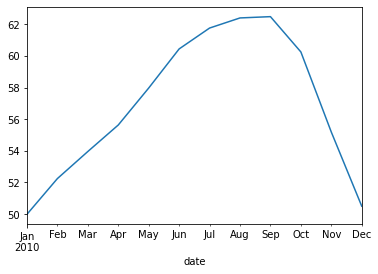

In [16]:
df.resample('M').temp.mean().plot(label = 'Monthly Min Temp Over Time')

**Takeaway: Jan is the coldest month on average**

# 5. Which month has the highest average temperature?

<AxesSubplot:xlabel='date'>

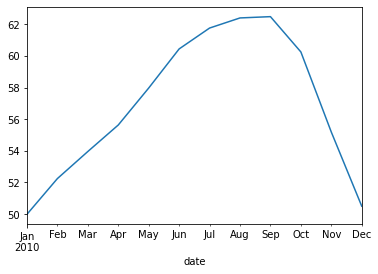

In [20]:
df.resample('M').temp.mean().plot(label = 'Monthly Min Temp Over Time')

**Takeaway: Sep is the coldest month on average**

## 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [31]:
df_daily = df.resample('D').temp.agg(['min', 'max']) 

In [32]:
df_daily.head()

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8


In [41]:
def calculate_temp_diff(df):
    diff = df['max'] - df['min']
    return df.assign(daily_temp_diff=diff)

df_daily = df_daily.pipe(calculate_temp_diff)

<AxesSubplot:xlabel='date'>

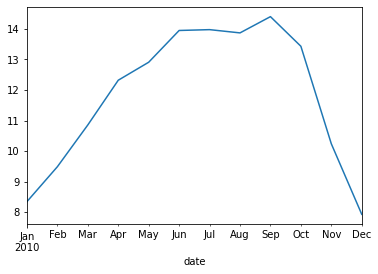

In [42]:
df_daily.resample('M').mean().daily_temp_diff.plot(label = 'Monthly Temp Variability')

**Takeaway: Sept has the greatest daily temp variability**

## Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

---

### Seattle Weather Data

In [159]:
from vega_datasets import data
#import seattle weather data
df = data.seattle_weather()
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [160]:
#Check the dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [161]:
#Set the index to datetime
df = df.set_index('date').sort_index()
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


## 1. Which year and month combination has the highest amount of precipitation?

In [63]:
df.resample('Y').precipitation.max()

date
2012-12-31    54.1
2013-12-31    43.4
2014-12-31    46.7
2015-12-31    55.9
Freq: A-DEC, Name: precipitation, dtype: float64

In [69]:
df.resample('M').precipitation.max().sort_values(ascending=False).head(1)

date
2015-03-31    55.9
Name: precipitation, dtype: float64

**Takeaway: March 2015 is the M-Y combo with the highest amount of precipitation**

## 2. Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

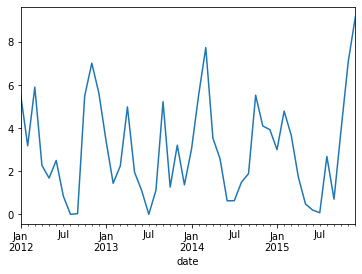

In [71]:
df.resample('M').mean().precipitation.plot()

## 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:xlabel='date'>

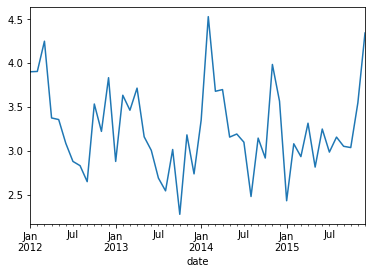

In [73]:
df.resample('M').mean().wind.plot()

## 4. Which year-month combination is the windiest?

In [74]:
df.resample('Y').wind.max()

date
2012-12-31    9.5
2013-12-31    8.8
2014-12-31    8.8
2015-12-31    8.0
Freq: A-DEC, Name: wind, dtype: float64

In [75]:
df.resample('M').wind.max().sort_values(ascending=False).head(1)

date
2012-12-31    9.5
Name: wind, dtype: float64

**Takeaways: December 2012 has been the windiest**

## 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [100]:
#Create a dataframe with just the sunny days
sunny_days_df = df[df.weather == 'sun']

#Convert sun to a numeric number for resampling
sunny_days_df = sunny_days_df.weather.replace('sun', 1)

#Calculate the days with most amount of sun
sunny_days_df.resample('Y').sum()

date
2012-12-31    118
2013-12-31    205
2014-12-31    211
2015-12-31    180
Freq: A-DEC, Name: weather, dtype: int64

**Takeaway: 2014 is the sunniest year**

## 6. In which month does it rain the most?

In [165]:
#Create a column with the name for the month 
df['month'] = df.index.month_name()

#Groupby month and return the mean preciptation for that month
df.groupby('month').precipitation.mean().sort_values(ascending=False)

#df.resample('M').precipitation.max().sort_values(ascending=False).head()

month
November     5.354167
December     5.021774
March        4.888710
October      4.059677
January      3.758065
February     3.734513
April        3.128333
September    1.962500
May          1.673387
August       1.320161
June         1.107500
July         0.388710
Name: precipitation, dtype: float64

**Takeaway: November is the month it rains the most**

## 7. Which month has the most number of days with a non-zero amount of precipitation?

**This is asking what is the wettest month**

In [166]:
#Create a column for identfying days where it doesn't precipitate
df['no_precip'] = df.precipitation.apply(lambda x: 1 if x == 0 else 1)

In [168]:
#Group by month and sum the column no_precip. 
#Months with the highest sum have the most amount of days WITHOUT precipitation.
#The lower sum has the most days WITH at least some precipitation
df.groupby('month').no_precip.sum().sort_values()

month
October      124
May          124
March        124
July         124
January      124
December     124
August       124
September    120
November     120
June         120
April        120
February     113
Name: no_precip, dtype: int64

**Takeaways: February is the wettest month**

---

In [121]:
#load the flights data
df = data.flights_20k()
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


In [123]:
#Set the index to datetime
df = df.set_index('date').sort_index()

In [124]:
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


## 1. Convert any negative delays to 0.

In [125]:
#Reassign values less than 0 to 0 in delay
df['delay'] = df['delay'].apply(lambda x: 0 if x < 0 else x)

In [141]:
#Check the replacement worked
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


## 2. Which hour of the day has the highest average delay?

In [142]:
df['hour'] = df.index.hour

In [148]:
df.groupby('hour').mean().sort_values(by = 'delay', ascending=False)

,delay,distance
hour,,
3,302.500000,322.000000
1,170.000000,256.000000
0,127.916667,424.583333
23,65.353846,369.107692
22,32.704607,374.978320
21,21.626768,397.796518
20,17.889778,450.998222
19,16.256557,501.912295
18,14.514218,516.674566


**Takeaway: 3:00 hours (3am) has the highest avg delay** 

## 3. Does the day of the week make a difference in the delay amount?

In [149]:
df['day_name'] = df.index.day_name()

<AxesSubplot:ylabel='day_name'>

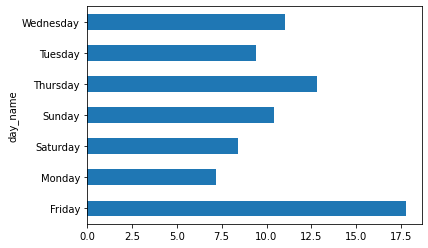

In [155]:
df.groupby('day_name').delay.mean().plot(kind='barh')

**Takeaway: Friday is the day of the week with the greatest avg delay. Monday has the lowest avg delay.**

## 4. Does the month make a difference in the delay amount?

In [157]:
df['month'] = df.index.month_name()

<AxesSubplot:ylabel='month'>

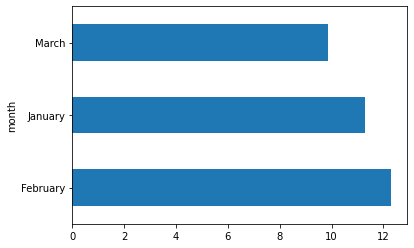

In [158]:
df.groupby('month').delay.mean().plot(kind='barh')

**February is the month in this sample with the greatest avg delay.**

---

### Bonus

In [171]:
from vega_datasets import data
df = data.iowa_electricity()

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            51 non-null     datetime64[ns]
 1   source          51 non-null     object        
 2   net_generation  51 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.3+ KB


In [173]:
#Set year column as the index
df = df.set_index('year').sort_index()

In [176]:
df.head()

,source,net_generation
year,,
2001-01-01,Fossil Fuels,35361
2001-01-01,Nuclear Energy,3853
2001-01-01,Renewables,1437
2002-01-01,Fossil Fuels,35991
2002-01-01,Nuclear Energy,4574


## 1. For each row, calculate the percentage of the year's total that energy source provided.